# Métodos não supervisionados - K-Means

Você tem em mãos dados de perfis de clientes de cartão de crédito e para propor melhores formas de resolver os problemas e propor ofertas a eles, é interessante dividir os clientes em partes semelhante.

Para entender melhor o perfil de cada cliente, você deve fazer uma clusterização com o método [K-Means](https://minerandodados.com.br/entenda-o-algoritmo-k-means/) e dizer qual é o perfil médio de dos clientes de cada cluster.

Você pode ler informações sobre esse dataset nesse link do [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata).

Para fazer a análise, você precisa:
- Tratar os dados e observar as estatísticas descritivas e distribuições dos dados
- Tratar outliers caso necessário
- Fazer uma transformação para standarizar os dados
- Fazer o KMEANS e utilizar o método do cotovelo para definir o número de clusters
- Através de boxplots, entender quais os perfis dos clusters e tentar caracterizar os clusters


In [ ]:
#aqui tem as bibliotecas que vamos utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

## 1) Importação dos dados

Aqui você deve exportar os dados do kaggle para o colab.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CC GENERAL.csv']))

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True) # aqui vamos retirar essa coluna porque ela só diz o ID do usuário

## 2) Tratamento, estatísticas descritivas e visualização dos dados

In [ ]:
df.describe() #estatisticas descritivas

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isna().sum() #aqui estamos vendo se o quanto de valores vazios temos no dataset

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(inplace=True) # como a soma dos valores vazios no dataset é de menos que 4%, só deletamos essas linhas

### 2.1) Histograma dos dados



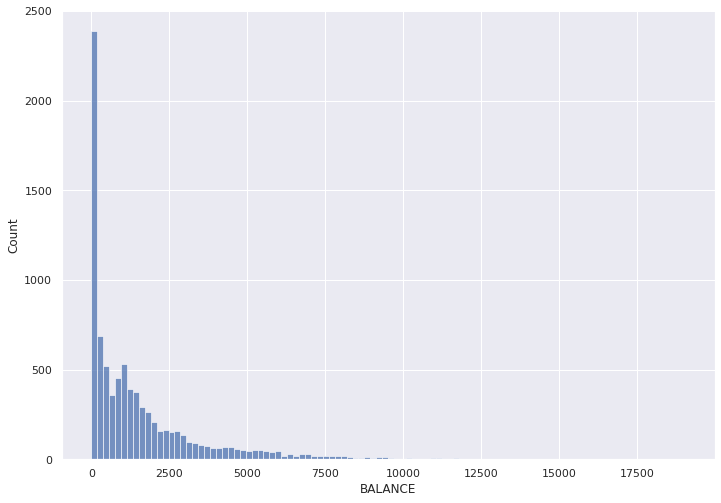

In [ ]:
sns.histplot(x="BALANCE", data=df)

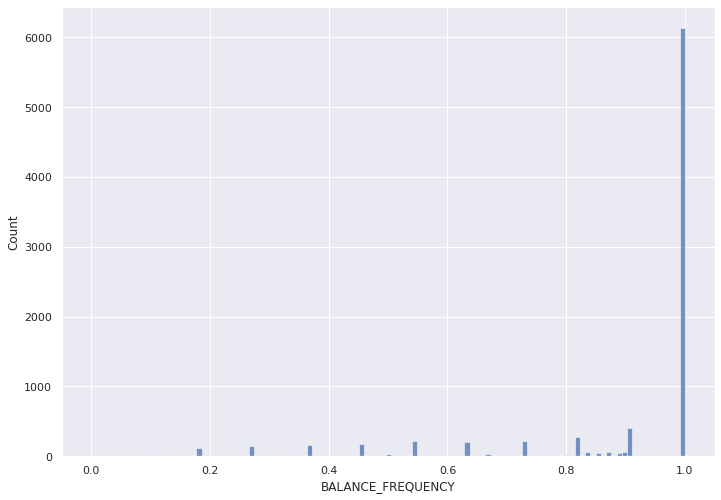

In [ ]:
sns.histplot(x="BALANCE_FREQUENCY", data=df)

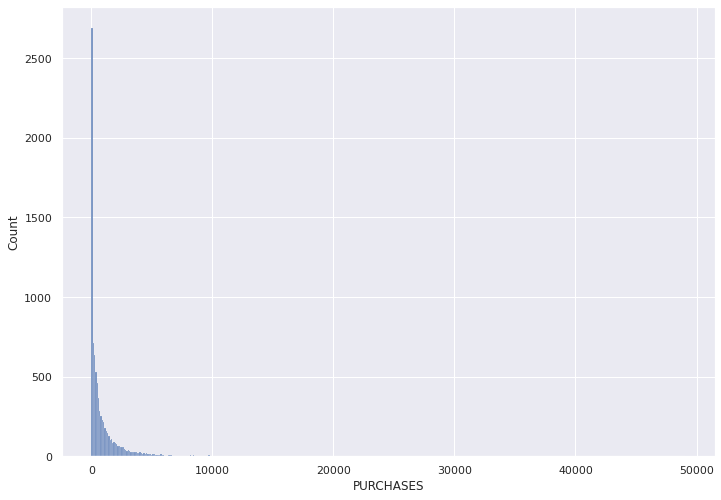

In [ ]:
sns.histplot(x="PURCHASES", data=df)
#purchases<2000

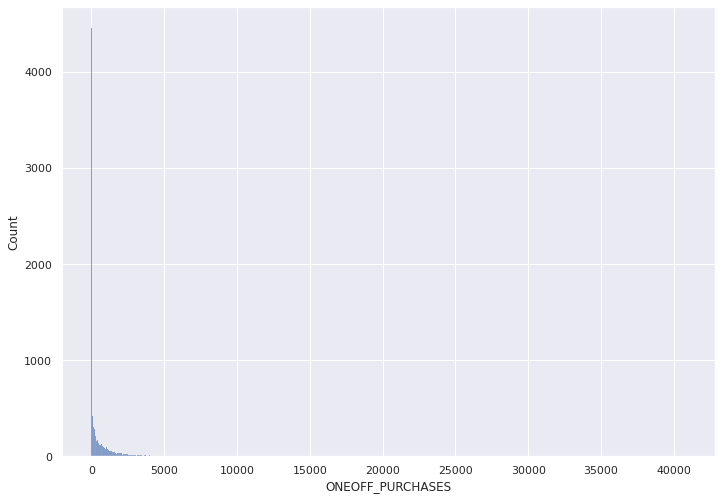

In [ ]:
sns.histplot(x='ONEOFF_PURCHASES', data=df)
#ONEOFF_PURCHASES<1000

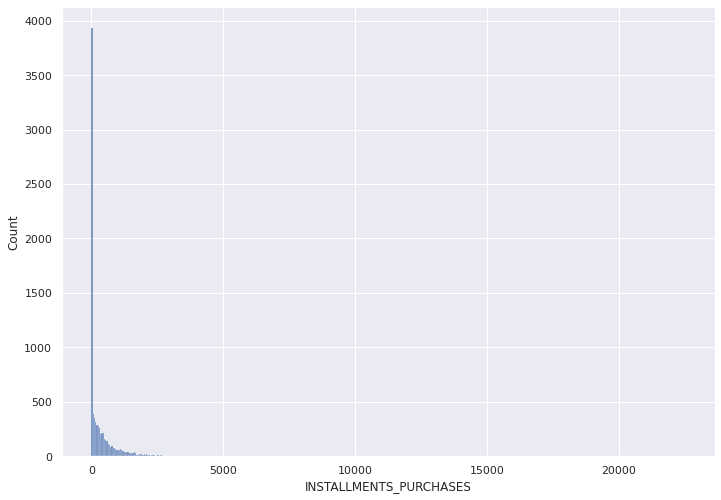

In [ ]:
sns.histplot(x='INSTALLMENTS_PURCHASES', data=df)
#INSTALLMENTS_PURCHASES<1000

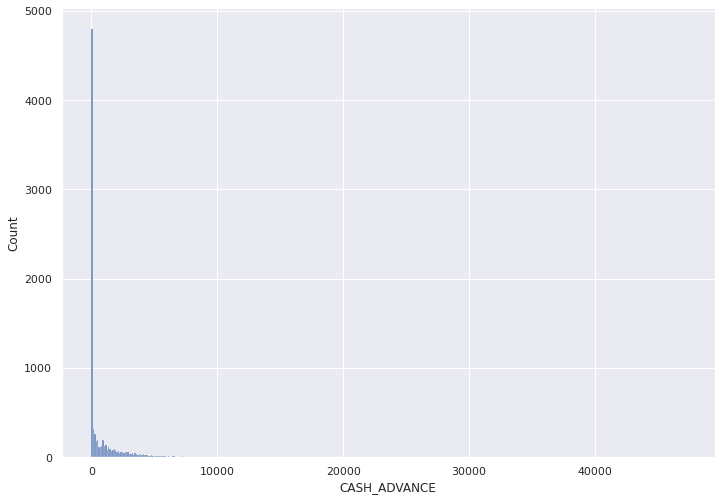

In [ ]:
sns.histplot(x='CASH_ADVANCE', data=df)

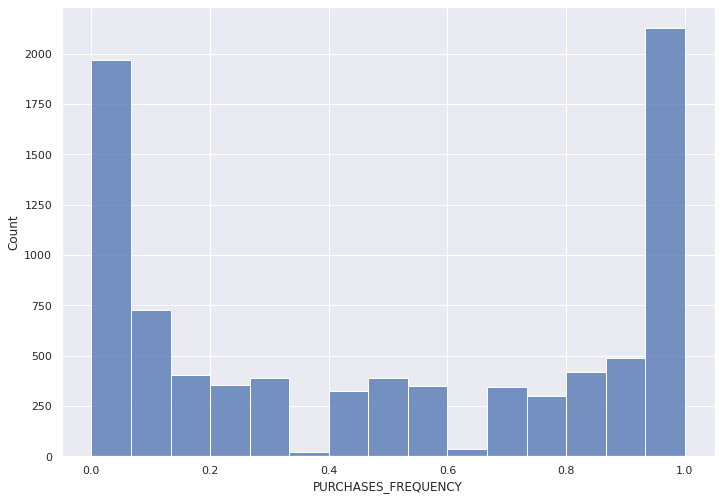

In [ ]:
sns.histplot(x='PURCHASES_FREQUENCY', data=df)

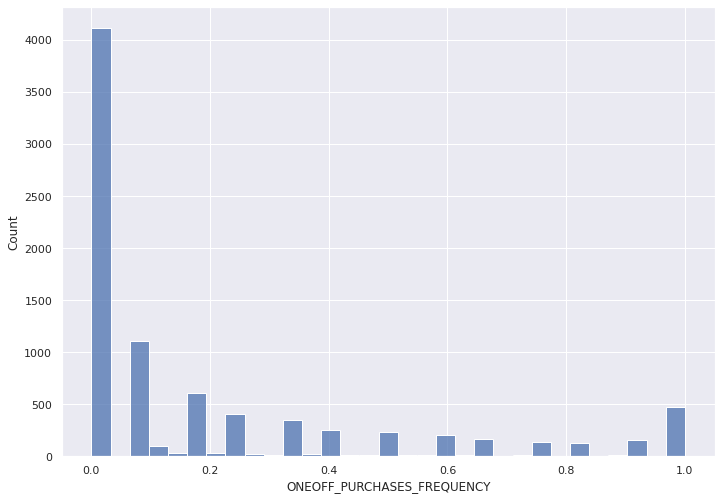

In [ ]:
sns.histplot(x='ONEOFF_PURCHASES_FREQUENCY', data=df)

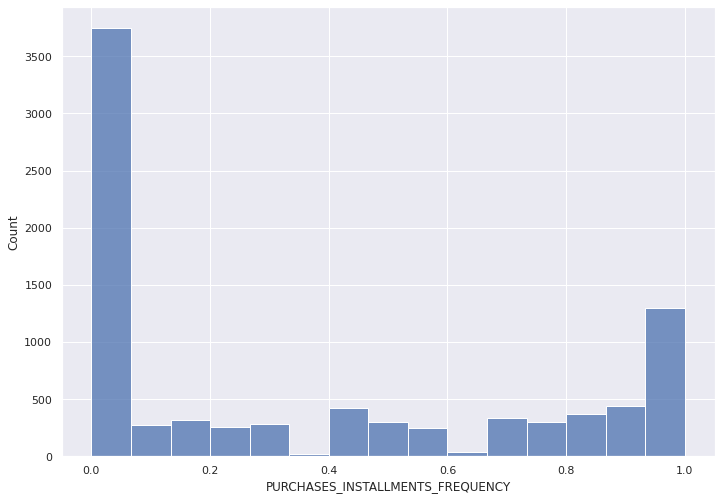

In [ ]:
sns.histplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', data=df)

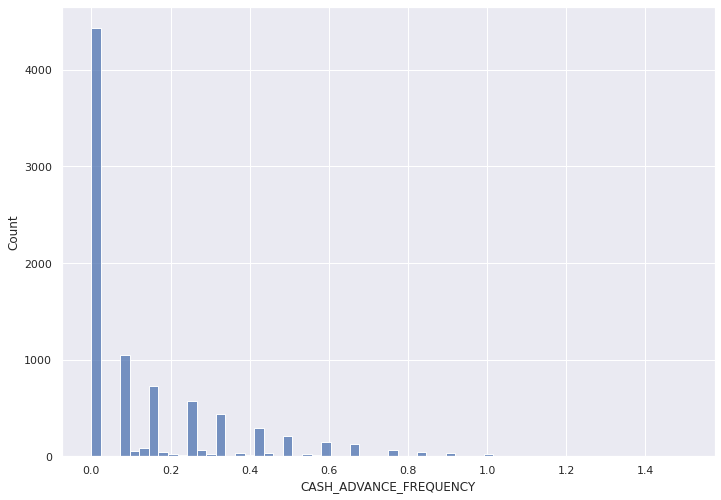

In [ ]:
sns.histplot(x='CASH_ADVANCE_FREQUENCY', data=df)

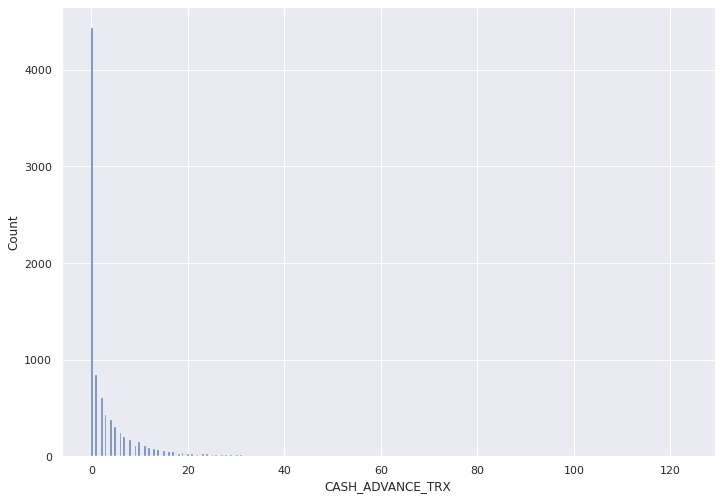

In [ ]:
sns.histplot(x='CASH_ADVANCE_TRX', data=df)

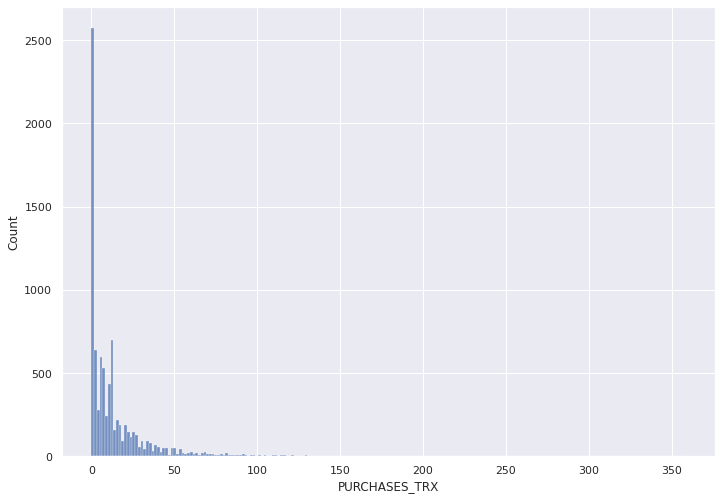

In [ ]:
sns.histplot(x='PURCHASES_TRX', data=df)

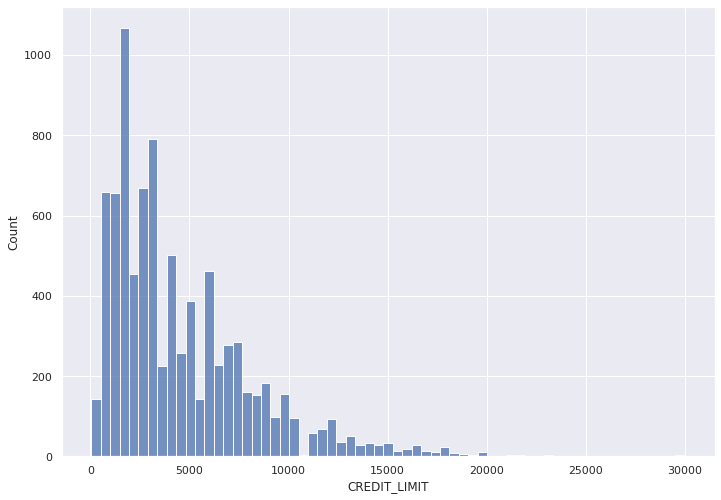

In [ ]:
sns.histplot(x='CREDIT_LIMIT', data=df)

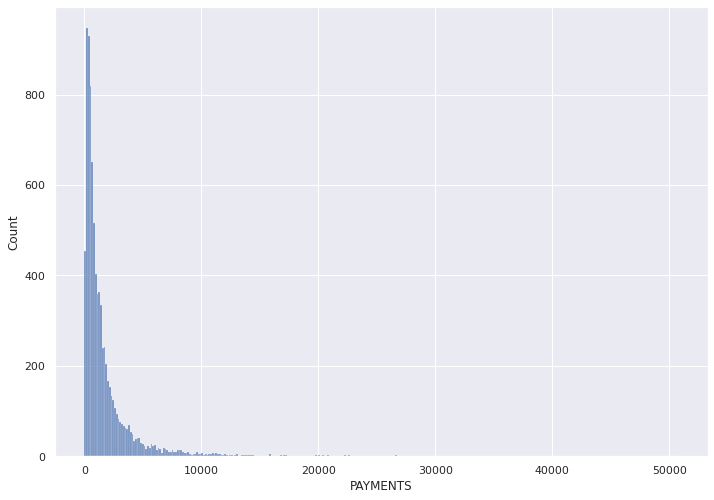

In [ ]:
sns.histplot(x='PAYMENTS', data=df)

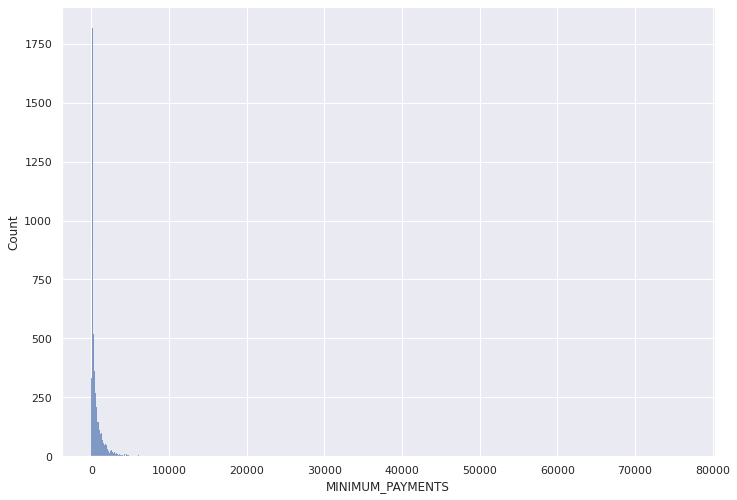

In [ ]:
sns.histplot(x='MINIMUM_PAYMENTS', data=df)

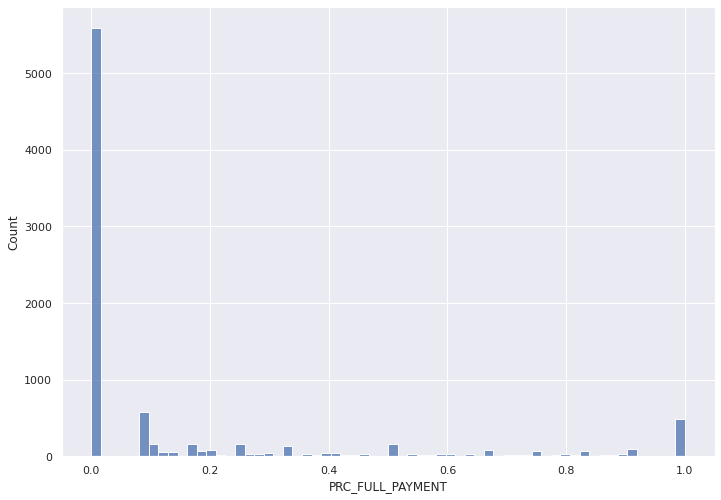

In [ ]:
sns.histplot(x='PRC_FULL_PAYMENT', data=df)

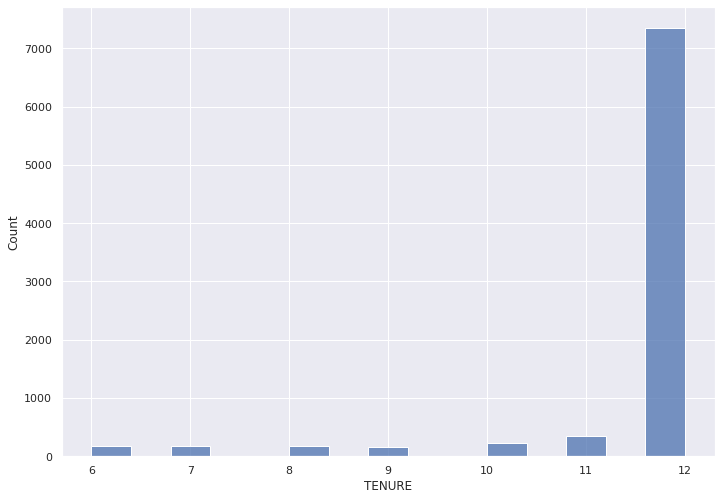

In [ ]:
sns.histplot(x='TENURE', data=df)

### 2.2) Matriz de correlação

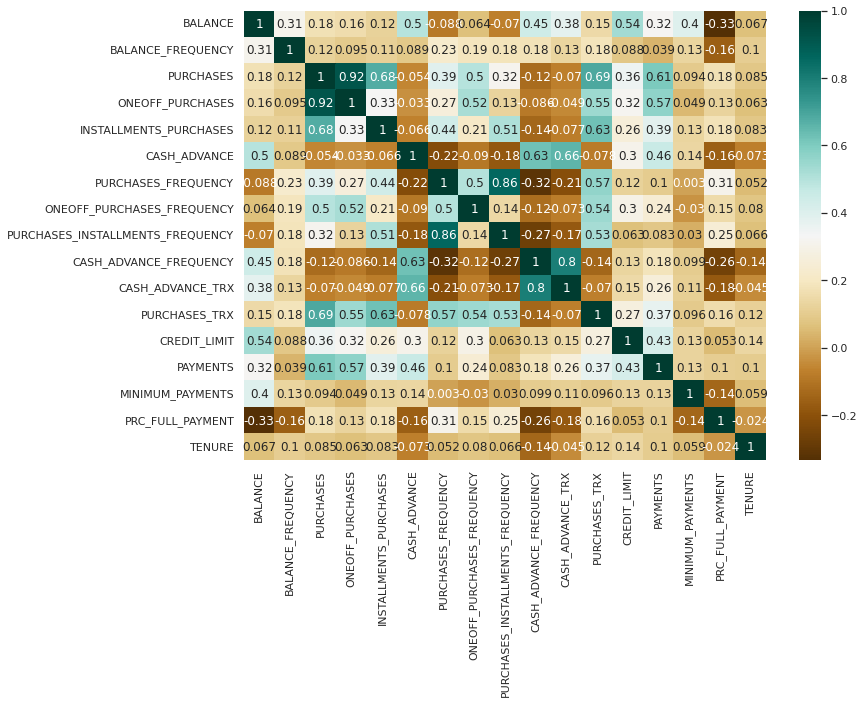

In [ ]:
sns.heatmap(df.corr(), annot=True,cmap='BrBG')

### 2.3) Tratamento de outliers

O critério que utilizaremos será selecionar somente até o percentil 95 dos dados de algumas colunas.

In [ ]:
df1=df[df['BALANCE'] < df['BALANCE'].quantile(.95)]
df1=df1[df1['PURCHASES'] < df['PURCHASES'].quantile(.95)]
df1=df1[df1['ONEOFF_PURCHASES'] < df['ONEOFF_PURCHASES'].quantile(.95)]
df1=df1[df1['INSTALLMENTS_PURCHASES'] < df['INSTALLMENTS_PURCHASES'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE'] < df['CASH_ADVANCE'].quantile(.95)]
df1=df1[df1['PAYMENTS'] < df['PAYMENTS'].quantile(.95)]
df1=df1[df1['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].quantile(.95)]
df1=df1[df1['MINIMUM_PAYMENTS'] < df['MINIMUM_PAYMENTS'].quantile(.95)]
df1=df1[df1['PURCHASES_TRX'] < df['PURCHASES_TRX'].quantile(.95)]
df1=df1[df1['CASH_ADVANCE_TRX'] < df['CASH_ADVANCE_TRX'].quantile(.95)]

In [ ]:
df1.describe() # aqui vemos que o dataset sem outlier ficou com 72% do tamanho original

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,1033.311577,0.877809,554.536775,308.446156,246.385346,514.032365,0.466394,0.166593,0.340292,0.103732,1.889744,9.687096,3450.850568,990.944527,431.748228,0.155692,11.482291
std,1206.100647,0.222430,677.924011,529.811771,358.327045,913.060565,0.390506,0.264152,0.382934,0.154863,3.034659,11.233066,2475.943803,967.556643,447.259724,0.291504,1.384023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.049513,0.019163,0.000000,6.000000
25%,86.169422,0.833333,38.105000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,347.211909,155.566415,0.000000,12.000000
50%,634.640503,1.000000,307.260000,0.000000,73.800000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,668.034343,239.010523,0.000000,12.000000
75%,1516.203839,1.000000,810.397500,406.945000,375.000000,706.973688,0.909091,0.250000,0.666667,0.166667,3.000000,13.000000,5000.000000,1298.769135,562.468752,0.166667,12.000000
max,5935.917803,1.000000,4021.290000,2723.470000,1791.280000,4715.033095,1.000000,1.000000,1.000000,1.166667,14.000000,58.000000,11500.000000,6135.140807,2766.440973,1.000000,12.000000


### 2.4) Standarização dos dados

In [ ]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df1)

### 2.5) Método do cotovelo para seleção do número de clusters

In [ ]:
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(normalized_df)
    inertias.append(kmeanModel.inertia_)

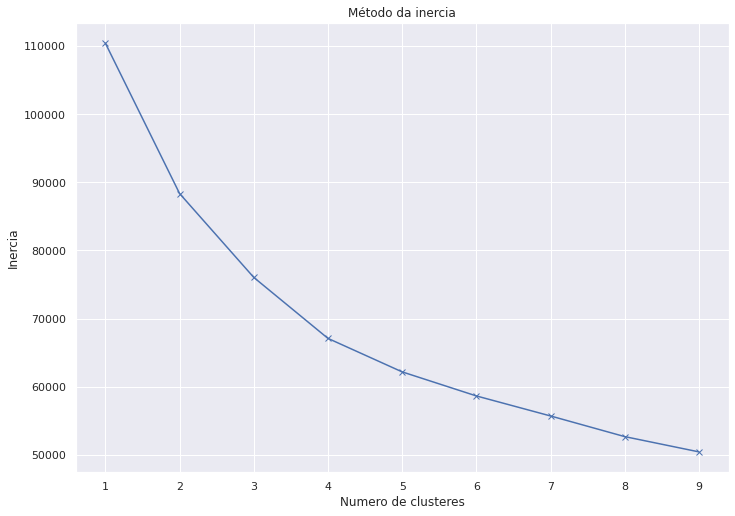

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Numero de clusteres')
plt.ylabel('Inercia')
plt.title('Método da inercia')
plt.show()

Aqui vamos escolher o numero de 4 clusters

In [ ]:
model = KMeans(4,random_state=42) #aqui treinamos o modelo
labels = model.fit_predict(normalized_df) #lembre-se de treinar com os dados normalizados

In [ ]:
df1['clusters']=labels # aqui vamos atribuir pra cada cliente o seu devido cluster
df1['clusters']=df1['clusters'].astype(str)

## 3) Análise dos clusteres



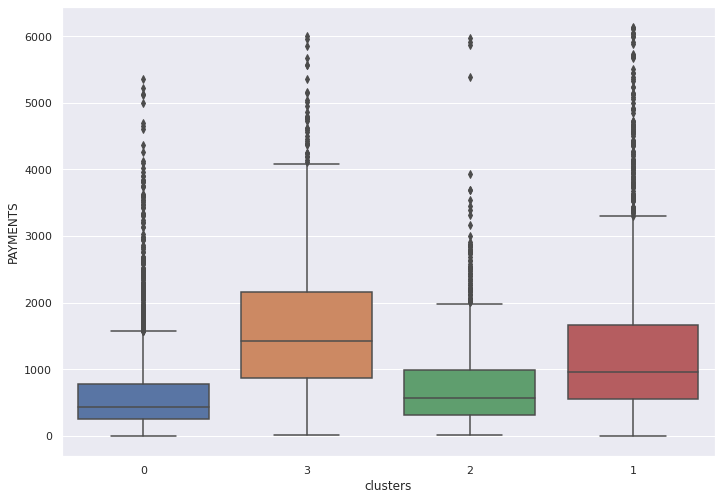

In [ ]:
sns.boxplot(x="clusters", y="PAYMENTS", data=df1)

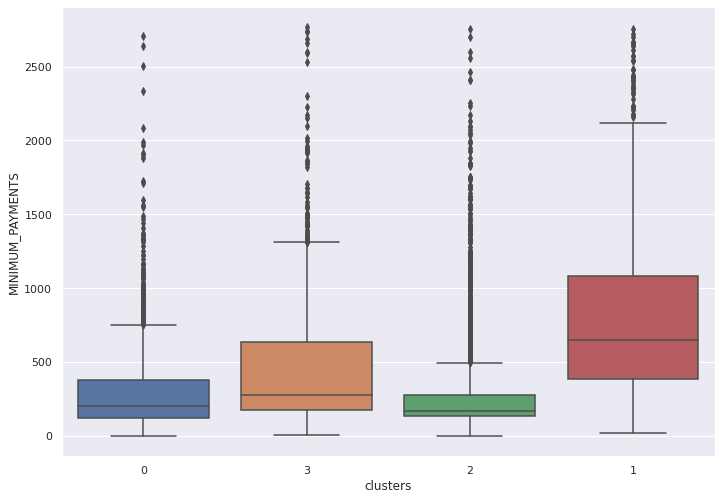

In [ ]:
sns.boxplot(x="clusters", y="MINIMUM_PAYMENTS", data=df1)

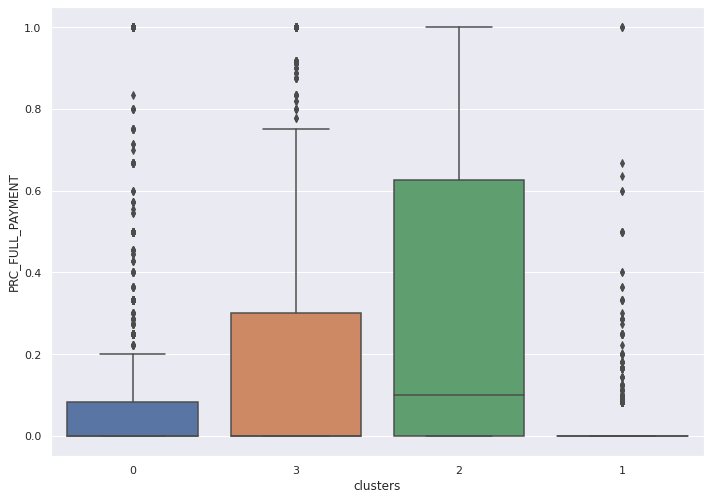

In [ ]:
sns.boxplot(x="clusters", y="PRC_FULL_PAYMENT", data=df1)

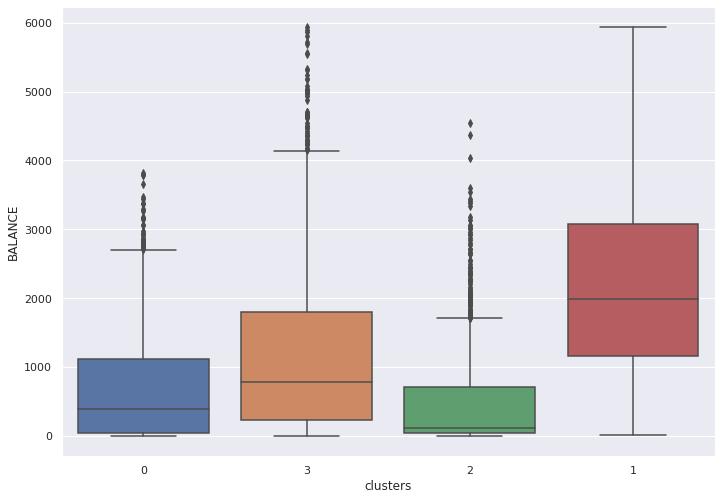

In [ ]:
sns.boxplot(x="clusters", y="BALANCE", data=df1)

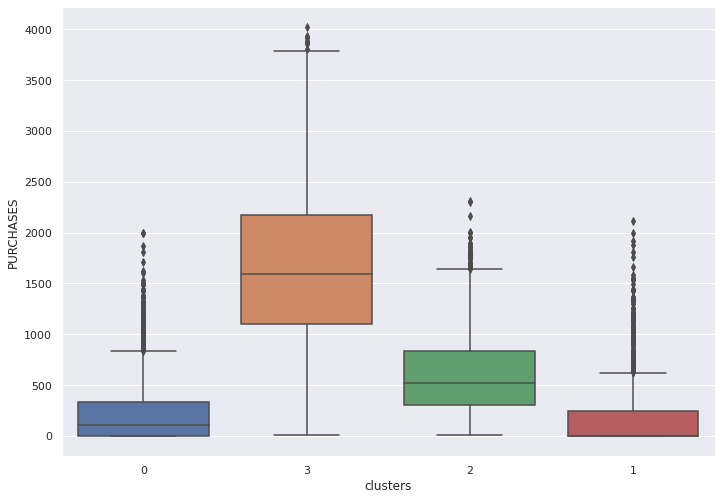

In [ ]:
sns.boxplot(x="clusters", y="PURCHASES", data=df1)

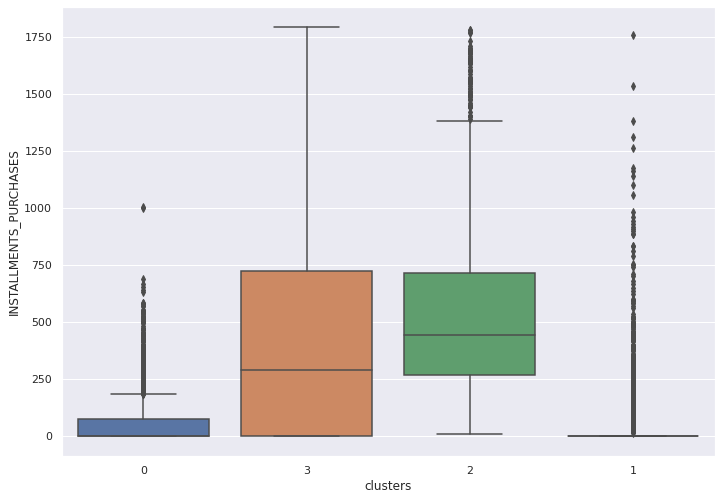

In [ ]:
sns.boxplot(x="clusters", y="INSTALLMENTS_PURCHASES", data=df1)

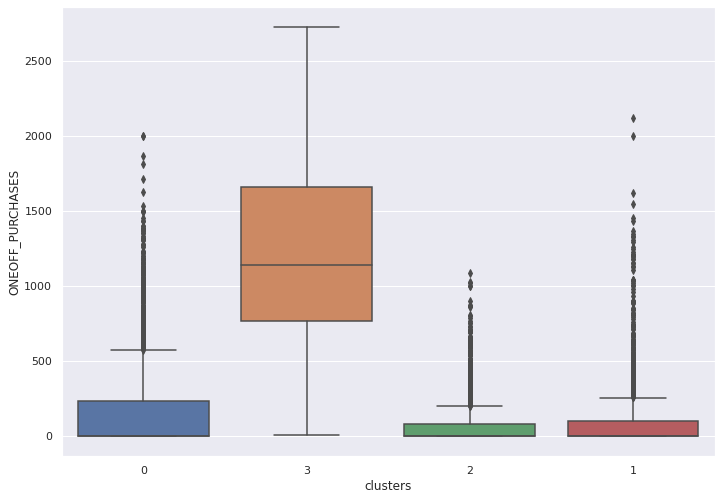

In [ ]:
sns.boxplot(x="clusters", y="ONEOFF_PURCHASES", data=df1)

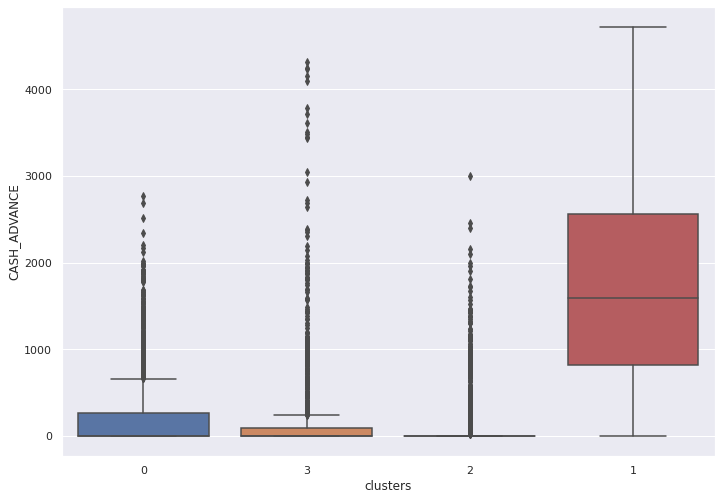

In [ ]:
sns.boxplot(x="clusters", y="CASH_ADVANCE", data=df1)

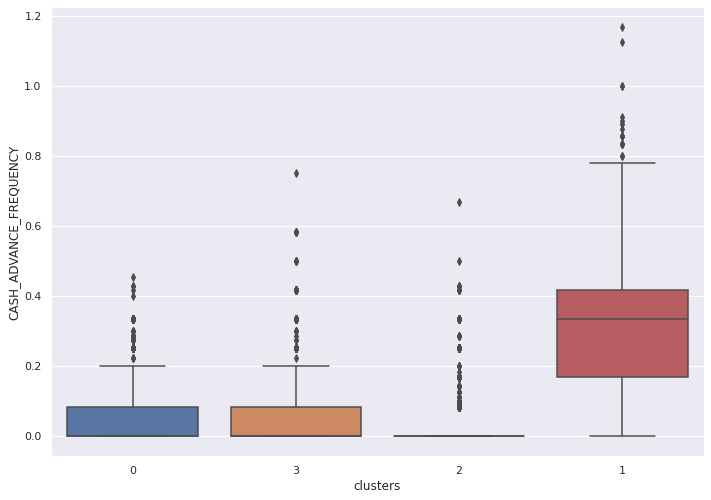

In [ ]:
sns.boxplot(x="clusters", y="CASH_ADVANCE_FREQUENCY", data=df1)

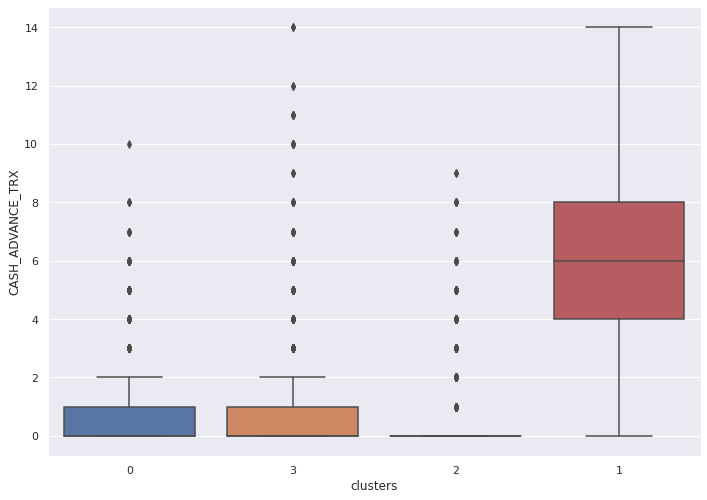

In [ ]:
sns.boxplot(x="clusters", y="CASH_ADVANCE_TRX", data=df1)

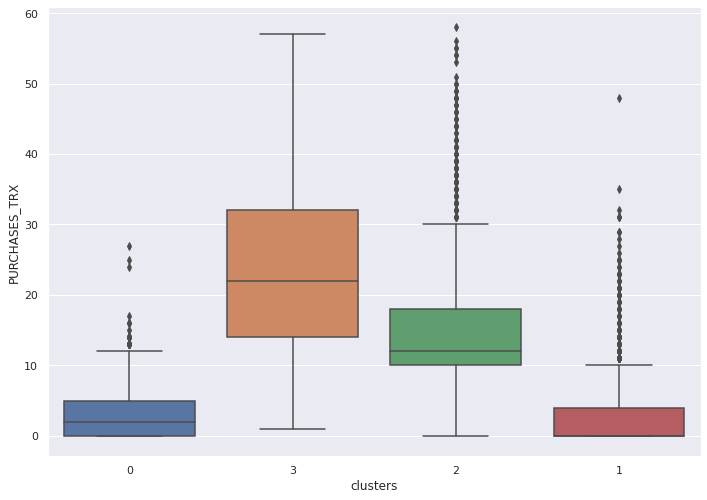

In [ ]:
sns.boxplot(x="clusters", y="PURCHASES_TRX", data=df1)

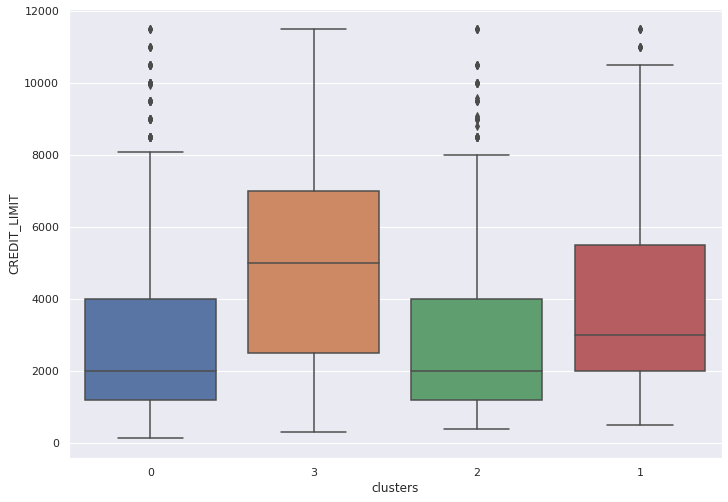

In [ ]:
sns.boxplot(x="clusters", y="CREDIT_LIMIT", data=df1)

## 4) Conclusão

Ao observar os clusteres e a descrição de cada variável, temos algumas variáveis que os boxplots mostram diferenças entre populações de forma que podemos criar 4 perfis. Um fato a ser observado é que tem muitos outliers quando se compara entre clusteres.

O primeiro perfil é o cliente contido (cluster 0), pois ele não compra muito em valor, não compra muito em quantidade e não paga adiantado.

O segundo perfil é o cliente comprador (cluster 1) pois ele compra muito em valor, compra muito em quantidade mas não paga adiantado.

O terceiro perfil que podemos construir (cluster 2) é o cliente em ascensão pois ele começando a comprar mais porém ainda compra em quantidade normal mas não paga adiantado.

O quarto perfil é o cliente não devedor (cluster 3) pois apesar de ser muito parecido com o cliente contido, esse cliente paga sempre adiantado as suas compras.

Esse tipo de descrição é muito útil para áreas não técnicas como relacionamento ao cliente, marketing, vendas e financeiro pois não mostra todas as contas que temos mas ainda sim revela alguns detalhe sobre a população que possa a ser útil ao negócio.